In [84]:
# import libraries necessary for data analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from env import host, user, password

In [85]:
# Standard url syntax to read external database into pandas `pd.read_sql` method.
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [86]:
# test to ensure url works and that I can connect to the employees DB.
# df_employees = pd.read_sql('select * from employees limit 5 offset 50', url)

## 1.
Load the `mpg` dataset.

> Read the documentation for it, and use the data to answer these questions:

In [87]:
# Within the pydataset `data` method I can load various datasets to work with.
# By entering the keyword argument `show_doc` = True, I can bring up the docs
# To the dataset.
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [88]:
# After reading the docs for the dataset, `mpg` I can use the `data` method to load the
# Dataset directly into my notebook.
df_mpg = data('mpg')

# The data type that is returned is a pandas DataFrame.
print(type(df_mpg))

# I use `.head` pandas method to print out the first 5 rows of the dataset.
df_mpg.head()

<class 'pandas.core.frame.DataFrame'>


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


On average, which `manufacturer` has the best miles per gallon?

## Step 1:
> Calculate the average miles per gallon for each vehicle.

In [89]:
# I use pandas `.assign` method to add a new column/series onto 'df_mpg'
# It's the same syntax as:
# df_mpg['avg_mpg'] = df_mpg[['cty', 'hwy']].mean(axis=1)

# Within the `.assign` method I am able to create a new column name without quotations.
# The column name is the variable name in the assignment statement within the `.assign`
# Method. I set 'avg_mpg' equal to a subset of columns in 'df_mpg'. The reason I need this
# Subset is to calculate the average miles per gallon per vehicle. Using the `.mean` method
# On the subset dataframe with an argument of `axis=1` I can calculate the mean across
# Rows not columns. If `axis=0`, then I would end up with average miles per gallon
# for ALL cars represented as a single scalar value.

# Once the subset is evaluated using the `.mean` with `axis=1` The result is a series
# of the averages of highway mpg and city mpg for EACH vehicle.

df_mpg = df_mpg.assign(avg_mpg = df_mpg[['cty', 'hwy']].mean(axis=1))

In [90]:
# single value per column. This doesn't answer our question.

df_mpg[['cty', 'hwy']].mean(axis=0)

cty    16.858974
hwy    23.440171
dtype: float64

In [91]:
df_mpg[['cty', 'hwy']].mean(axis=1) # single value per row. This is what we need.

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Length: 234, dtype: float64

## Step 2:
Once I have the new column of average miles per gallon for each vehicle, we can group by `manufacturer`.

In [92]:
# I use the pandas `.groupby` method to group data using the column `manufacturer`
# This groups all data from each vehicle according to the manufacturer. We need
# To do this because we want to find the manufacturer with the best average miles
# Per gallon 
df_manufac = df_mpg.groupby(by='manufacturer')

In [93]:
# The `.groupby` method creates a groupby object that hold statistical information about
# our dataset, `mpg`.
df_manufac.describe()

displ                                                       year  \
             count      mean           std  min    25%  50%    75%  max count   
manufacturer                                                                    
audi          18.0  2.544444  6.732032e-01  1.8  2.000  2.8  3.025  4.2  18.0   
chevrolet     19.0  5.063158  1.370406e+00  2.4  4.450  5.3  5.850  7.0  19.0   
dodge         37.0  4.378378  8.679910e-01  2.4  3.800  4.7  4.700  5.9  37.0   
ford          25.0  4.536000  5.407402e-01  3.8  4.000  4.6  4.600  5.4  25.0   
honda          9.0  1.711111  1.452966e-01  1.6  1.600  1.6  1.800  2.0   9.0   
hyundai       14.0  2.428571  3.646464e-01  2.0  2.100  2.4  2.650  3.3  14.0   
jeep           8.0  4.575000  1.015241e+00  3.0  3.925  4.7  4.950  6.1   8.0   
land rover     4.0  4.300000  2.581989e-01  4.0  4.150  4.3  4.450  4.6   4.0   
lincoln        3.0  5.400000  1.087792e-15  5.4  5.400  5.4  5.400  5.4   3.0   
mercury        4.0  4.400000  4.898979e-01  4.0  4.000  4.3  4.700  5.0   4.0   
nissan        13.0  3.269231  8.644696e-01  2.4  2.500  3.3  3.500  5.6  13.0   
pontiac        5.0  3.960000  8.080842e-01  3.1  3.800  3.8  3.800  5.3   5.0   
subaru        14.0  2.457143  1.089410e-01  2.2  2.500  2.5  2.500  2.5  14.0   
toyota        34.0  2.952941  9.313513e-01  1.8  2.250  2.7  3.400  5.7  34.0   
volkswagen    27.0  2.255556  4.431820e-01  1.8  2.000  2.0  2.500  3.6  27.0   

                           ...    hwy       avg_mpg                       \
                     mean  ...    75%   max   count       mean       std   
manufacturer               ...                                             
audi          2003.500000  ...  27.75  31.0    18.0  22.027778  1.996116   
chevrolet     2004.684211  ...  26.00  30.0    19.0  18.447368  3.950720   
dodge         2004.108108  ...  21.00  24.0    37.0  15.540541  3.005500   
ford          2002.600000  ...  22.00  26.0    25.0  16.680000  2.540833   
honda         2003.000000  ...  34.00  36.0     9.0  28.500000  1.984313   
hyundai       2004.142857  ...  28.00  31.0    14.0  22.750000  1.794757   
jeep          2005.750000  ...  19.25  22.0     8.0  15.562500  2.859040   
land rover    2003.500000  ...  18.00  18.0     4.0  14.000000  1.154701   
lincoln       2002.000000  ...  17.50  18.0     3.0  14.166667  0.763763   
mercury       2003.500000  ...  19.00  19.0     4.0  15.625000  0.478714   
nissan        2003.846154  ...  27.00  32.0    13.0  21.346154  4.214976   
pontiac       2002.600000  ...  27.00  28.0     5.0  21.700000  0.974679   
subaru        2004.142857  ...  26.00  27.0    14.0  22.428571  0.957905   
toyota        2002.705882  ...  29.75  37.0    34.0  21.720588  5.059032   
volkswagen    2002.666667  ...  29.00  44.0    27.0  25.074074  4.904283   

                                                 
               min     25%    50%     75%   max  
manufacturer                                     
audi          19.5  20.625  21.50  23.375  25.5  
chevrolet     12.5  15.250  19.00  21.250  26.0  
dodge         10.5  13.500  15.00  18.000  21.0  
ford          13.0  15.000  15.50  18.500  22.0  
honda         25.0  28.000  28.50  30.000  30.5  
hyundai       20.0  22.000  22.50  23.875  26.0  
jeep          10.5  14.750  16.00  17.125  19.5  
land rover    13.0  13.000  14.00  15.000  15.0  
lincoln       13.5  13.750  14.00  14.500  15.0  
mercury       15.0  15.375  15.75  16.000  16.0  
nissan        15.0  17.000  22.00  23.000  27.5  
pontiac       20.5  21.000  22.00  22.000  23.0  
subaru        20.5  22.000  22.50  23.375  23.5  
toyota        13.0  17.500  22.00  25.750  32.5  
volkswagen    19.5  22.500  25.00  25.000  39.5  

[15 rows x 48 columns]

## Step 3.
Once I have the grouped manufacturers, I can select the series of data I need.

In [94]:
# From the groupby object, I can use bracket notation to return only the 'avg_mpg' column
# To isolate the information I need. Once I have the series, I can use the `.mean` method
# To calculate the average mpg of all vehicles WITHIN a given manufacturer. I use double
# Square brackets around the column name 'avg_mpg' to return a dataframe instead of a series.

manufac_avg_mpg = df_manufac[['avg_mpg']].mean()

In [95]:
# I can sort the dataframe 'manufac_avg_mpg' by the column'avg_mpg' to quickly locate
# The manufacturer that has the highest 'avg_mpg'.

manufac_avg_mpg.sort_values(by='avg_mpg', ascending=False)

,avg_mpg
manufacturer,
honda,28.500000
volkswagen,25.074074
hyundai,22.750000
subaru,22.428571
audi,22.027778
toyota,21.720588
pontiac,21.700000
nissan,21.346154
chevrolet,18.447368


In [96]:
# I can use .head(1) or .mlargest to select the manufacturer with the best/highest
# Average miles per gallon.

manufac_best_mpg = manufac_avg_mpg.nlargest(1, columns='avg_mpg')
manufac_best_mpg

,avg_mpg
manufacturer,
honda,28.5


How many different `manufacturer`s are there?

In [97]:
# I tried to use the `nunique` method on the groupby object of manufacturers but I did not
# get the results I wanted. I used dot notation to select the `manufacturer` attribute
# From the original dataframe and used the `.nunique` method to count up the number
# of distinct/unique manufacturer names.

num_of_manufacturers = df_mpg.manufacturer.nunique()

print(f"There are {num_of_manufacturers} manufacturers.")

There are 15 manufacturers.


How many different `models` are there?

In [98]:
# Similar to the way I found distinct manufacturers, I can use the `.nunique` method
# To count up all the different models using the `.model` attribute.
num_of_models = df_mpg.model.nunique()

print(f"There are {num_of_models} models.")

There are 38 models.


Do `automatic` or `manual` cars have better miles per gallon?

In [99]:
# Well I spent longer than I would have liked because there wasn't a
# Question in the Exocortex that directly handled by situation, so I experimented until
# I removed everything in the parentheses using regex!

df_mpg['trans'] = df_mpg['trans'].str.replace('\(.*\)', '')

In [100]:
df_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize,22.0


In [101]:
trans_avg_mpg = df_mpg[['trans', 'avg_mpg']].groupby(by='trans').mean()
trans_avg_mpg

,avg_mpg
trans,
auto,19.130573
manual,22.227273


## 2.
Joining and Merging

> Copy the `users` and `roles` dataframes from the examples above.

In [102]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

> What do you think a right join would look like? 

In [103]:
users.merge(roles, how='right')

,id,name,role_id
0,1,admin,NaN
1,2,author,NaN
2,3,reviewer,NaN
3,4,commenter,NaN


> An outer join?

In [104]:
pd.merge(users, roles, how='outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


> What happens if you drop the foreign keys from the dataframes and try to merge them?

In [105]:
del users['id'], roles['id']

In [106]:
pd.merge(users, roles)

,name,role_id


## 3.
Getting data from SQL databases

Create a function named `get_db_url`. It should accept a `username`, `hostname`, `password`, and `database` name and return a `url` formatted like in the examples in this lesson.

In [107]:
# THANK YOU FAITH! I totally forgot about default values for kwargs!!!!

def get_db_url(database, username=user, hostname=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{database}'

Use your function to obtain a connection to the employees database.

In [108]:
df_employees = pd.read_sql('select * from employees;',
                           get_db_url(database='employees'))

Once you have successfully run a query:
> Intentionally make a typo in the database `url`. What kind of error message do you see?

In [109]:
df_employees_url_error = pd.read_sql('select * from employees;',
                                     get_db_url(database='employees'))

Intentionally make an error in your SQL query. What does the error message look like?

In [110]:
# df_sql_query_error = pd.read_sql("Sselect * from employees;",
#                                 get_db_url(host, user, password, database='employees'))

Read the employees and titles tables into two separate dataframes

In [111]:
df_employees = pd.read_sql_table('employees',
                                 get_db_url(database='employees'))

df_titles = pd.read_sql_table('titles',
                              get_db_url(database='employees'))

In [112]:
df_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [113]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      300024 non-null  int64         
 1   birth_date  300024 non-null  datetime64[ns]
 2   first_name  300024 non-null  object        
 3   last_name   300024 non-null  object        
 4   gender      300024 non-null  object        
 5   hire_date   300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 13.7+ MB


In [114]:
df_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


In [115]:
df_titles['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

Visualize the number of employees with each title.

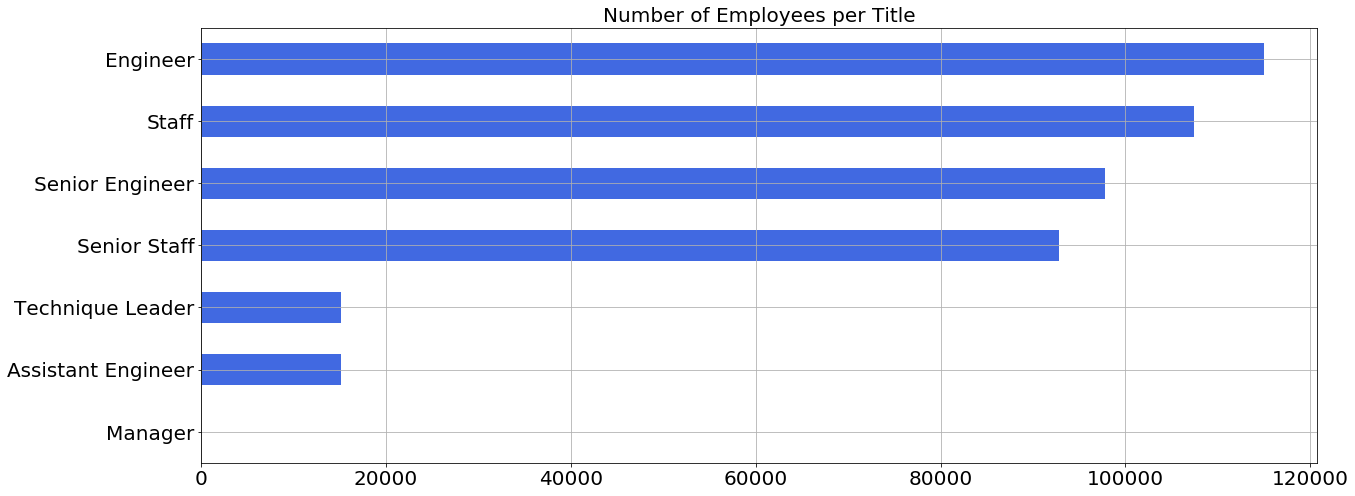

In [116]:
emps_per_titles = df_titles.groupby(by='title').emp_no.count().sort_values()


plt.figure(figsize=(20, 8))

emps_per_titles.plot.barh(color='Royalblue')

plt.title('Number of Employees per Title', fontsize=20)
plt.ylabel(None)
plt.tick_params(labelsize=20)

plt.grid(1000);

In [117]:
df_emp_titles = pd.merge(df_employees, df_titles)

In [118]:
df_current_emp_titles = df_emp_titles[df_emp_titles.to_date.isin(['NaT'])]

# num_cur_emp_titles = df_current_emp_titles.title.value_counts(ascending=True)
# print(num_cur_emp_titles)

num_cur_emp_titles = df_current_emp_titles.title.value_counts(
    normalize=True, ascending=True) # normalized

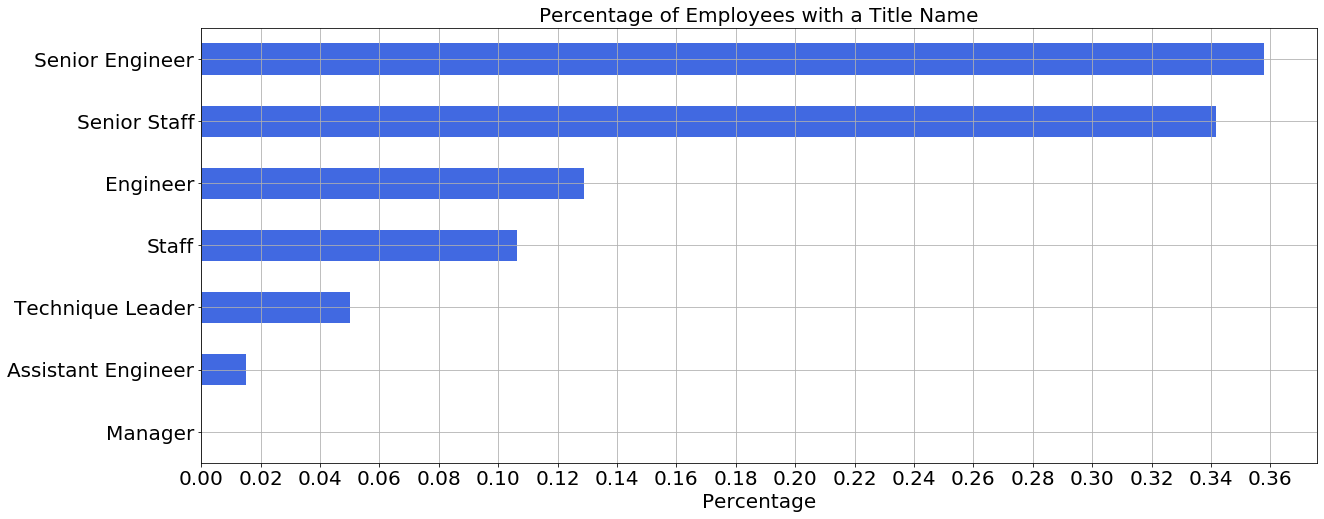

In [119]:
plt.figure(figsize=(20, 8))

num_cur_emp_titles.plot.barh(color='Royalblue')

plt.title('Percentage of Employees with a Title Name', fontsize=20)

plt.xlabel('Percentage', fontsize=20)
plt.xticks(np.arange(0, .38, .02))
plt.tick_params(labelsize=20)

plt.grid(1000);

Join the employees and titles dataframes together.

In [120]:
df_emp_titles = pd.merge(df_employees, df_titles)

df_emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,NaT
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,NaT
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,NaT
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,NaT


Visualize how frequently employees change titles.

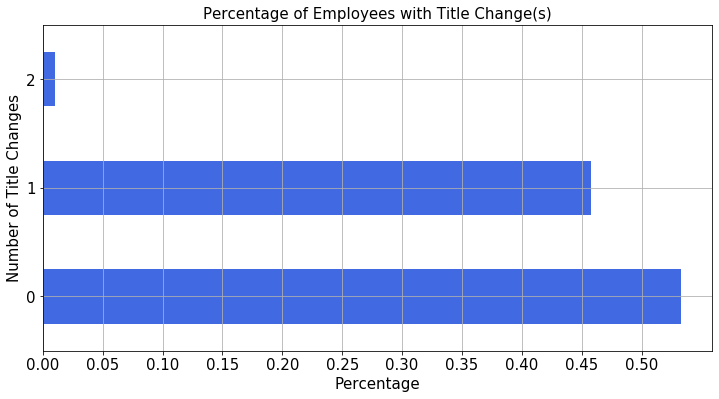

In [121]:
emp_title_change_freq = df_emp_titles.groupby(by='emp_no').title.count().value_counts(normalize=True)

plt.figure(figsize=(12, 6))
g = emp_title_change_freq.plot.barh(color='Royalblue')

plt.title('Percentage of Employees with Title Change(s)',
          fontsize=15)

plt.xlabel('Percentage', fontsize=15)
plt.xticks(np.arange(0, .55, .05))
plt.ylabel('Number of Title Changes', fontsize=15)
plt.yticks()
plt.tick_params(labelsize=15)

# Thank you Faith! This makes way more sense.
g.set_yticklabels([0, 1, 2])

plt.grid();

For each title, find the hire date of the employee that was hired most recently with that title.

In [122]:
recent_hire_per_title = df_current_emp_titles.loc[df_current_emp_titles.groupby(
    by='title')['hire_date'].idxmax()].sort_values(by='hire_date')

# filtered results to find the most recent hire date for each title where the employee
# still works for the company.

recent_hire_per_title

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
148155,110420,1963-07-27,Oscar,Ghazalie,M,1992-02-05,Manager,1996-08-30,NaT
357298,441722,1958-12-01,Gonzalo,Aamodt,F,1999-12-15,Technique Leader,1999-12-15,NaT
212605,243702,1961-10-04,Munehiro,Luke,F,1999-12-24,Assistant Engineer,2000-01-07,NaT
145474,108201,1955-04-14,Mariangiola,Boreale,M,2000-01-01,Senior Engineer,2000-01-01,NaT
55137,47291,1960-09-09,Ulf,Flexer,M,2000-01-12,Staff,2000-01-26,NaT
182100,222965,1959-08-07,Volkmar,Perko,F,2000-01-13,Senior Staff,2000-01-29,NaT
337630,428377,1957-05-09,Yucai,Gerlach,M,2000-01-23,Engineer,2000-01-23,NaT


Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [124]:
df_num_titles = pd.read_sql("""
select dept_name, title
from titles
join dept_emp using(emp_no)
join departments using(dept_no);
""", get_db_url(database='employees'))

In [125]:
pd.crosstab(df_num_titles.dept_name, df_num_titles.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


## 4.
Use your `get_db_url` function to help you explore the data from the `chipotle` database. Use the data to answer the following questions:

In [126]:
df_chipotle = pd.read_sql("""
select *
from orders;""", get_db_url(database='chipotle'))

In [127]:
# df_chipotle.to_csv('chipotle.csv')

In [134]:
df_chipotle = pd.read_csv('chipotle.csv')

In [135]:
df_chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          4622 non-null   int64 
 1   id                  4622 non-null   int64 
 2   order_id            4622 non-null   int64 
 3   quantity            4622 non-null   int64 
 4   item_name           4622 non-null   object
 5   choice_description  3376 non-null   object
 6   item_price          4622 non-null   object
dtypes: int64(4), object(3)
memory usage: 252.9+ KB


In [136]:
df_chipotle.head()

,Unnamed: 0,id,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,2,1,1,Izze,[Clementine],$3.39
2,2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,3,4,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


What is the total price for each order?

In [137]:
df_chipotle.item_price = df_chipotle.item_price.str.replace('$', '').astype('float')

In [138]:
total_order_price = df_chipotle.groupby(by='order_id')[['item_price']].sum()
total_order_price.sample(5)

,item_price
order_id,
1709,13.00
942,10.18
217,22.20
1024,18.50
1644,14.45


! [Chipotle Menu](https://www.google.com/url?sa=i&url=https%3A%2F%2Frestaurantguru.com%2FChipotle-Arvada%2Fmenu&psig=AOvVaw2oEywvUvCabtHnrTUpyJ-3&ust=1597606396793000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKj-1eD5nesCFQAAAAAdAAAAABAm)

In [139]:
# Data cleaning
# df_chipotle.item_name = df_chipotle.item_name.str.replace('-',' ')
# df_chipotle.item_name = df_chipotle.item_name.str.replace('Soft Drink','Soda')
# df_chipotle.item_name = df_chipotle.item_name.str.replace('Salad Bowl', 'Salad')
# df_chipotle.item_name = df_chipotle.item_name.str.replace('Mild ', '')

What are the most popular 3 items?

In [140]:
top_3_items = df_chipotle['item_name'].value_counts().nlargest(3)
print(top_3_items)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: item_name, dtype: int64


Which item has produced the most revenue?

In [141]:
revenue_per_item = df_chipotle.groupby(by='item_name')['item_price'].sum()
most_popular_item = revenue_per_item.idxmax()  # returns a string
most_popular_item_revenue = revenue_per_item.max()

print(f"Menu item that produced the most revenue: {most_popular_item} - ${round(most_popular_item_revenue, 2)}")

Menu item that produced the most revenue: Chicken Bowl - $7342.73
